In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  #for spliting to train and test
from sklearn.ensemble import RandomForestRegressor #for fitting the RandomForest Model to Training Model
from sklearn.metrics import mean_squared_error #used for gini index

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image

import seaborn as sns

In [5]:
########### importing the data frame ##############

df = pd.read_csv(r'C:\Users\ASUS\Desktop\Random_Forest_Project\cardio_disease.csv', delimiter=';')

In [6]:
# finding type of each column:
df.dtypes

id               int64
age            float64
gender           int64
height           int64
weight         float64
ap_hi          float64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [7]:
# Display the dataframe (tail)
df.tail(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69990,99986,15094.0,1,168,72.0,110.0,70,1,1,0,0,1,1
69991,99988,20609.0,1,159,72.0,NaN,90,2,2,0,0,1,0
69992,99990,18792.0,1,161,56.0,170.0,90,1,1,0,0,1,1
69993,99991,NaN,1,172,70.0,130.0,90,1,1,0,0,1,1
69994,99992,21074.0,1,165,80.0,150.0,80,1,1,0,0,1,1
69995,99993,19240.0,2,168,76.0,120.0,80,1,1,1,0,1,0
69996,99995,22601.0,1,158,126.0,140.0,90,2,2,0,0,1,1
69997,99996,19066.0,2,183,105.0,180.0,90,3,1,0,1,0,1
69998,99998,22431.0,1,163,72.0,135.0,80,1,2,0,0,0,1
69999,99999,20540.0,1,170,72.0,120.0,80,2,1,0,0,1,0


In [8]:
# Display the dataframe (head)
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393.0,2,168,62.0,110.0,80,1,1,0,0,1,0
1,1,20228.0,1,156,85.0,140.0,90,3,1,0,0,1,1
2,2,18857.0,1,165,64.0,130.0,70,3,1,0,0,0,1
3,3,17623.0,2,169,82.0,150.0,100,1,1,0,0,1,1
4,4,17474.0,1,156,56.0,100.0,60,1,1,0,0,0,0
5,8,21914.0,1,151,67.0,NaN,80,2,2,0,0,0,0
6,9,NaN,1,157,93.0,130.0,80,3,1,0,0,1,0
7,12,NaN,2,178,95.0,130.0,90,3,3,0,0,1,1
8,13,17668.0,1,158,71.0,110.0,70,1,1,0,0,1,0
9,14,NaN,1,164,68.0,110.0,60,1,1,0,0,0,0


In [9]:
#Display the shape
df.shape

(70000, 13)

Axes(0.125,0.11;0.775x0.77)


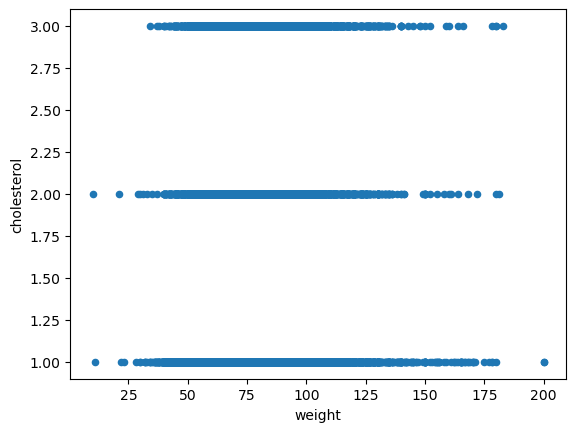

In [10]:
# creating compelling visualizations
print(df.plot(x='weight', y='cholesterol', kind='scatter'))

In [11]:
# Display duplicated values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Length: 70000, dtype: bool

In [12]:
#Display number of null values
df.isna().sum()

id             0
age            8
gender         0
height         0
weight         0
ap_hi          6
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [13]:
#https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
# correlation matrix between all the features we are examining and our y-variable
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003514,0.003502,-0.003038,-0.001830,0.003352,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003514,1.000000,-0.022829,-0.081543,0.053639,0.020770,0.017651,0.154368,0.098667,-0.047620,-0.029713,-0.009945,0.238184
gender,0.003502,-0.022829,1.000000,0.499033,0.155406,0.006007,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081543,0.499033,1.000000,0.290968,0.005484,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053639,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003352,0.020770,0.006007,0.005484,0.030702,1.000000,0.016085,0.023776,0.011840,-0.000924,0.001407,-0.000034,0.054473
ap_lo,-0.002529,0.017651,0.015254,0.006150,0.043710,0.016085,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154368,-0.035821,-0.050226,0.141768,0.023776,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098667,-0.020491,-0.018595,0.106857,0.011840,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047620,0.338135,0.187989,0.067780,-0.000924,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


<Axes: >

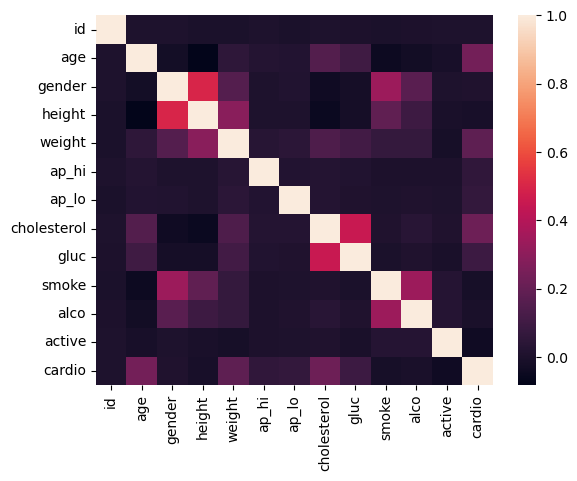

In [14]:
# Display the heatmap
sns.heatmap(df.corr())

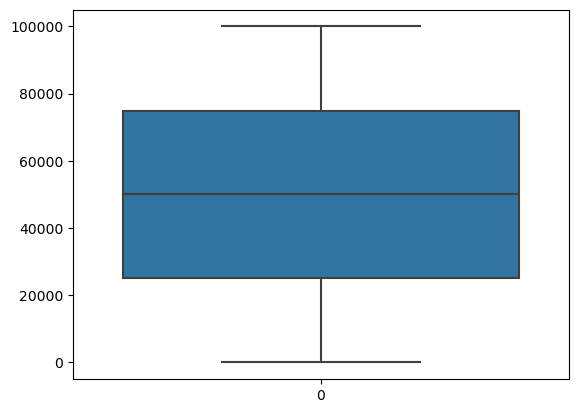

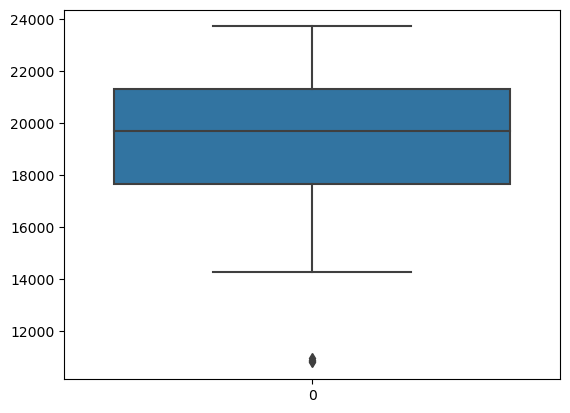

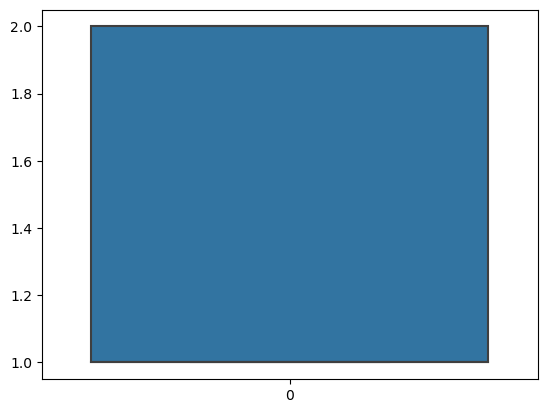

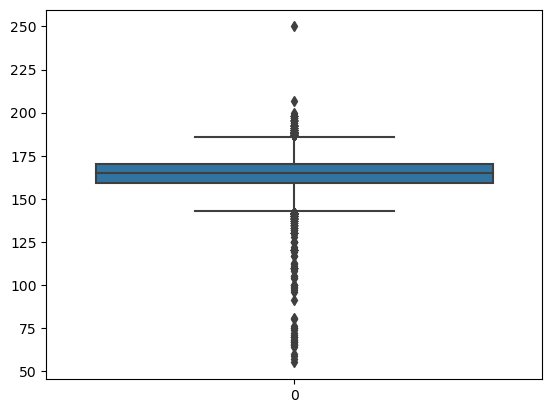

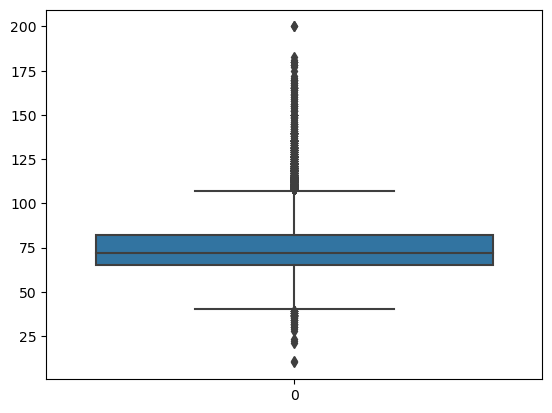

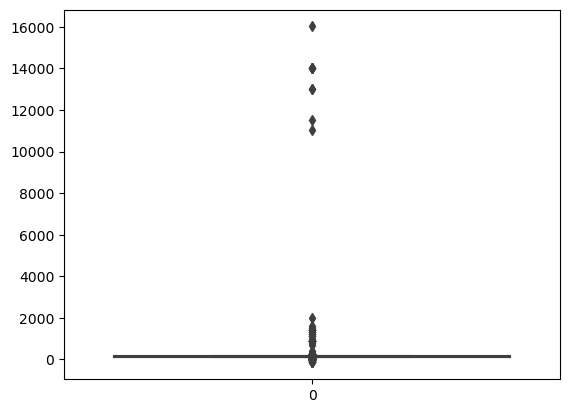

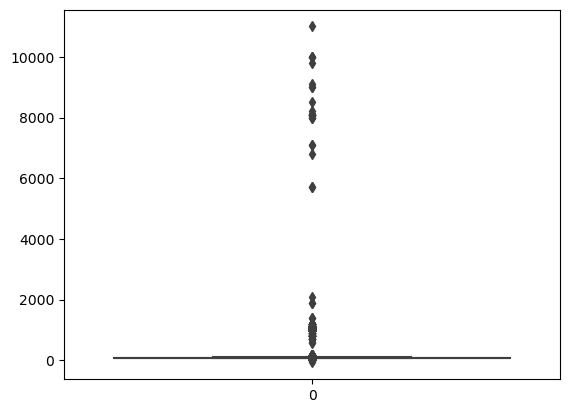

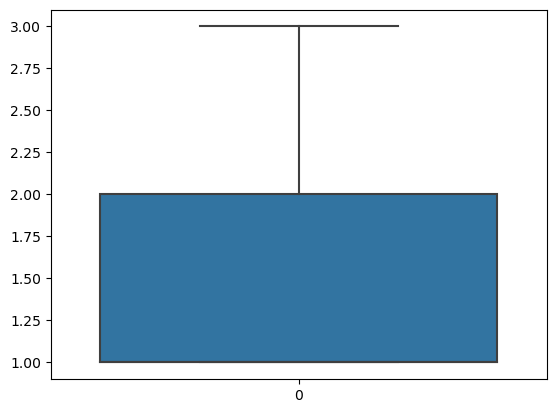

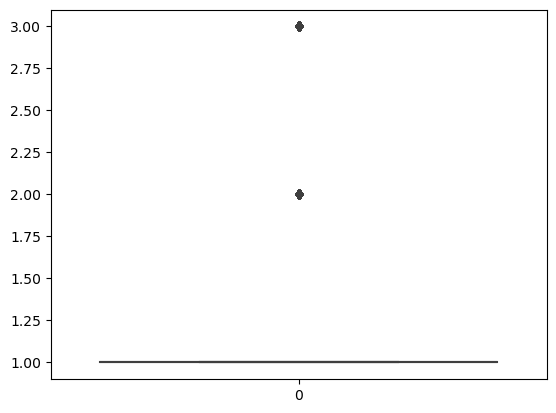

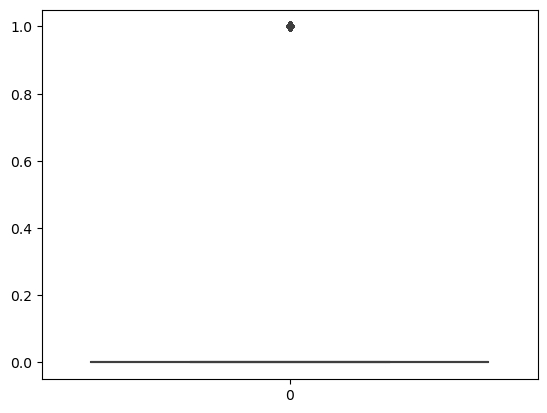

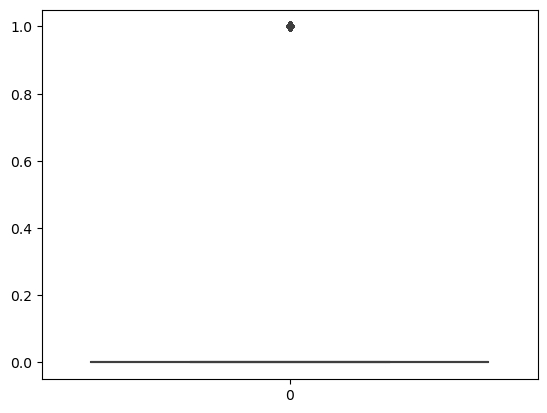

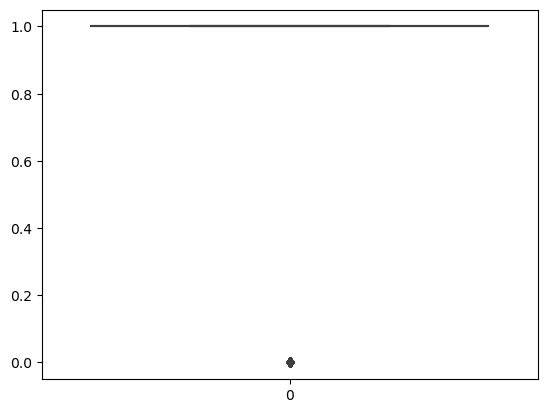

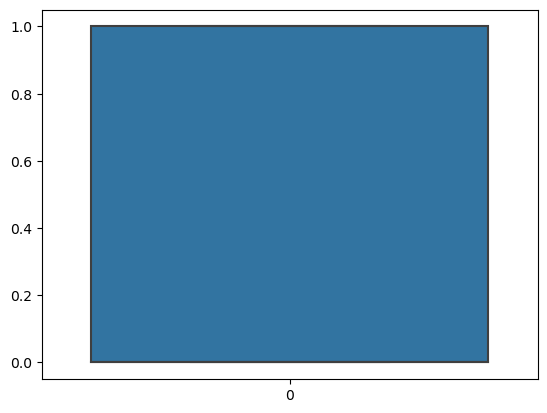

In [15]:
# Create a boxplot for each column in the dataframe
for column in df.columns:
    sns.boxplot(data=df[column])
    # Display the plot
    plt.show()

######## Filling the missing values ###########

In [16]:
######## Filling the missing values ########### 
df_fill = df.interpolate(method='linear', limit_direction='both')

In [20]:
####### checking the missing values again #########
df_fill.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [21]:
df = df_fill

In [22]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393.000000,2,168,62.0,110.0,80,1,1,0,0,1,0
1,1,20228.000000,1,156,85.0,140.0,90,3,1,0,0,1,1
2,2,18857.000000,1,165,64.0,130.0,70,3,1,0,0,0,1
3,3,17623.000000,2,169,82.0,150.0,100,1,1,0,0,1,1
4,4,17474.000000,1,156,56.0,100.0,60,1,1,0,0,0,0
5,8,21914.000000,1,151,67.0,115.0,80,2,2,0,0,0,0
6,9,20498.666667,1,157,93.0,130.0,80,3,1,0,0,1,0
7,12,19083.333333,2,178,95.0,130.0,90,3,3,0,0,1,1
8,13,17668.000000,1,158,71.0,110.0,70,1,1,0,0,1,0
9,14,20099.000000,1,164,68.0,110.0,60,1,1,0,0,0,0


In [23]:
df.shape

(70000, 13)

In [24]:
########## changing the age from date into year ##########
df['age'] = df['age']/365

In [25]:
df['age'] = df['age'].round().astype(int)

In [26]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110.0,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140.0,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130.0,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150.0,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100.0,60,1,1,0,0,0,0
5,8,60,1,151,67.0,115.0,80,2,2,0,0,0,0
6,9,56,1,157,93.0,130.0,80,3,1,0,0,1,0
7,12,52,2,178,95.0,130.0,90,3,3,0,0,1,1
8,13,48,1,158,71.0,110.0,70,1,1,0,0,1,0
9,14,55,1,164,68.0,110.0,60,1,1,0,0,0,0


In [27]:
# drop rows containing outliers
#df = df.drop(outliers.index)

In [28]:
############## Removing Outliers #############

########### Specify the threshold for determining outliers (e.g., z-score threshold)
#z_score_threshold = 3

########### Identify outliers in each column
#outliers = (np.abs((df - df.mean()) / df.std()) > z_score_threshold).any(axis=1)

########### Remove rows containing outliers
#df_no_outliers = df[~outliers]

In [29]:
######## Display the DataFrame without outliers
#df_no_outliers.head()

In [30]:
######### checking the shape again after removing the outliers 
#df = df_no_outliers
#df.shape

In [31]:
###########3 Normalizing the data #############
######A z-score normalized value that is positive corresponds to an x value that is greater than the mean value,
######while a z-score that is negative corresponds to an x value that is less than the mean.


# Select the columns to be normalized
columns_to_normalize = ['id', 'age', 'gender', 'height','weight','ap_hi','ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio' ]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the selected columns
scaler.fit(df[columns_to_normalize])

# Transform the selected columns
df.loc[:, columns_to_normalize] = scaler.transform(df[columns_to_normalize])
# I got a warning that this changes are donr=e on the copy and not the ral dataframe. so i changed it
###df[columns_to_normalize] = scaler.transform(df[columns_to_normalize])

In [32]:
# Display the normalized DataFrame
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,-1.732080,-0.493444,1.364055,0.443452,-0.847873,-0.122188,-0.088238,-0.539322,-0.39572,-0.310879,-0.238384,0.494167,-0.9994
1,-1.732046,0.245617,-0.733108,-1.018168,0.749831,0.072604,-0.035180,2.400793,-0.39572,-0.310879,-0.238384,0.494167,1.0006
2,-1.732011,-0.197819,-0.733108,0.078047,-0.708942,0.007673,-0.141297,2.400793,-0.39572,-0.310879,-0.238384,-2.023607,1.0006
3,-1.731976,-0.789068,1.364055,0.565254,0.541435,0.137535,0.017879,-0.539322,-0.39572,-0.310879,-0.238384,0.494167,1.0006
4,-1.731942,-0.789068,-0.733108,-1.018168,-1.264666,-0.187119,-0.194356,-0.539322,-0.39572,-0.310879,-0.238384,-2.023607,-0.9994


In [34]:
########## SPLITING TO TRAIN AND TEST ###############
# Split the data into features (X) and target (y)
X = df.drop('id', axis=1)
y = df['id']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
######### Fitting the Data ###########
from sklearn.ensemble import RandomForestRegressor

# Assuming you have the following variables:
# X_train: The feature columns of the training set
# y_train: The target/label columns of the training set

# Create the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [37]:
y_pred

array([-0.08341104, -0.46092806,  0.21888236, ...,  0.14741173,
       -0.49295492,  1.17139847])

In [38]:
##### Finding Max_depth and Best_number_of_Trees #############

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming you have the following variables:
# X_train: The feature columns of the training set
# y_train: The target/label columns of the training set
# X_test: The feature columns of the test set
# y_test: The target/label columns of the test set

# Try different values for the number of trees and max depth
n_estimators_list = [50, 100, 200]
max_depth_list = [5, 10, 15, None]

best_score = float('inf')
best_n_estimators = None
best_max_depth = None

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        # Create the Random Forest Regressor model
        rf_model = RandomForestRegressor(n_estimators=n_estimators,
                                         max_depth=max_depth,
                                         criterion='squared_error',
                                         random_state=42)
        
        # Fit the model to the training data
        rf_model.fit(X_train, y_train)
        
        # Evaluate the model on the test set
        y_pred = rf_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        
        # Update the best parameters if the current model has a lower MSE
        if mse < best_score:
            best_score = mse
            best_n_estimators = n_estimators
            best_max_depth = max_depth
            
print(f"Best number of trees: {best_n_estimators}")
print(f"Best max depth: {best_max_depth}")
print(f"Best MSE: {best_score:.2f}")

Best number of trees: 200
Best max depth: 5
Best MSE: 0.98


In [44]:
########## Accuracy of the model #########
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: 1.04


######## Gini Index #######

The Gini impurity ranges between 0 and 1, where 0 represents a pure dataset and 1 represents a completely impure dataset(In a pure dataset, all the samples belong to the same class or category.

For example, if we have a dataset with two classes “Yes” and “No”, and the class probabilities are:

p(Yes) = 0.3 and p(No) = 0.7

If we were to randomly pick a sample from the dataset, there would be a 30% chance that the sample belongs to the “Yes” class and a 70% chance that the sample belongs to the “No” class. If we were to randomly assign one of the class labels to the sample, there would be a 45% chance that we would assign the wrong label to the sample.

###R-Squared (Coefficient of Determination): This measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It ranges from 0 to 1, with 1 indicating a perfect fit. You can calculate it using the r2_score function from Scikit-learn:

from sklearn.metrics import r2_score
y_true = y_test
y_pred = model.predict(X_test)
r2 = r2_score(y_true, y_pred)
print(f"R-Squared: {r2:.2f}")





###Mean Absolute Error (MAE): This measures the average absolute difference between the predicted and true values. It's a useful metric because it's easy to interpret in the original units of the target variable.
python
Copy
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")






###Root Mean Squared Error (RMSE): This measures the square root of the average squared difference between the predicted and true values. RMSE is more sensitive to outliers than MAE.
python
Copy
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_true, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse:.2f}")








###Mean Squared Error (MSE): This measures the average squared difference between the predicted and true values. It's a useful metric, but the units are squared, so it's harder to interpret than MAE or RMSE.
python
Copy
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
The choice of metric depends on the specific needs of your problem and the interpretation you want to give to the model's performance. R-squared is a good general-purpose metric, while MAE and RMSE provide more intuitive interpretations in the original units of the target variable.